In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model Visualization

In [20]:
import glob
import os

import matplotlib.pyplot as plt
import viz
import random
import PIL

### Load a pre-trained MAE model

In [21]:
model1 = viz.prepare_model(
    chkpt_dir="out_mae_vit_tiny_xformers_scaled_dot_product_MLP_i64_p8_b512_e200-mse",
    arch="mae_vit_tiny",
)

model2 = viz.prepare_model(
    chkpt_dir="out_mae_vit_tiny_xformers_scaled_dot_product_MLP_i64_p8_b512_e200-l1",
    arch="mae_vit_tiny",
)


models = {"tiny_i64p8_mse": model1, "tiny_i64p8_l1": model2}

# model = viz.prepare_model(chkpt_dir="out_mae_vit_small_scaled_dot_product_i128_p16_b512_e200",
#                           chkpt_name="40", # Optional
#                           arch="mae_vit_small")

Loading checkpoint:  ../Model_Saving/out_mae_vit_tiny_xformers_scaled_dot_product_MLP_i64_p8_b512_e200-mse/checkpoint-199.pth
args: {'batch_size': 512, 'epochs': 200, 'accum_iter': 1, 'model_type': None, 'model': 'mae_vit_tiny', 'input_size': 64, 'patch_size': 8, 'attn_name': 'scaled_dot_product', 'ffn_name': 'MLP', 'use_xformers': True, 'mask_ratio': 0.75, 'spatial_mask': False, 'norm_pix_loss': False, 'weight_decay': 0.05, 'lr': 0.002, 'blr': 0.001, 'min_lr': 0.0, 'warmup_epochs': 40, 'train_path': '../fmow-rgb-preproc/train_64.csv', 'dataset_type': 'rgb', 'masked_bands': None, 'dropped_bands': None, 'grouped_bands': [], 'output_dir': '../Model_Saving/out_mae_vit_tiny_xformers_scaled_dot_product_MLP_i64_p8_b512_e200', 'log_dir': './logs', 'device': 'cuda', 'seed': 0, 'resume': '', 'wandb': 'satmae_debug', 'wandb_entity': 'utk-iccv23', 'start_epoch': 0, 'num_workers': 10, 'pin_mem': True, 'world_size': 1, 'local_rank': 0, 'dist_on_itp': False, 'dist_url': 'env://', 'distributed': Fals

In [22]:
def show_comp(image, models, maskseed=None, use_noise=None, resample=None, title=None, figsize=12, savedir="plots"):
    """
    :param resample: An optional resampling filter.  This can be
           one `Resampling.NEAREST`, `Resampling.BOX`,
           `Resampling.BILINEAR`, `Resampling.HAMMING`,
           `Resampling.BICUBIC`, `Resampling.LANCZOS`.
    """
    # if model is not an array, make it an array
    if not isinstance(models, dict):
        models = {"model": models}
        
    fig, axs = plt.subplots(len(models), 4, figsize=(figsize, len(models)*figsize/4))
    
    if title is not None:
        fig.suptitle(title)

    # make the plt figure larger
    # plt.rcParams["figure.figsize"] = [figsize, figsize]
    print(len(models))
        
    for model_i, (model_name, model) in enumerate(models.items()):
        # if img is string
        if isinstance(image, str):
            img = viz.prepare_image(image, model, resample=resample)
        else:
            img = image
            
        if use_noise is not None:
            img = viz.add_noise(img, noise_type=use_noise[0], noise_param=use_noise[1])
        
        x, im_masked, y, im_paste = viz.run_one_image(img, model, seed=maskseed)
        
        imgs = [x[0], im_masked[0], y[0], im_paste[0]]
        titles = ["original", "masked", model_name, "reconstruction + visible"]
    
        for i in range(4):
            ax = axs[model_i, i] if len(models) > 1 else axs[i]
            viz.show_image(imgs[i], ax, titles[i])
    
    plt.tight_layout()
    if title is not None:
        # remove all spaces and special characters from the title
        save_fname = "".join([c for c in title if c.isalpha() or c.isdigit() or c==' ']).rstrip()
        # replace all spaces with underscores
        save_fname = save_fname.replace(' ', '_')
        # if folder does not exist, create it
        if not os.path.exists(savedir):
            os.makedirs(savedir)
        plt.savefig(os.path.join(savedir, f"plot_viz_{save_fname}.png"))
    else:
        print("INFO: Skipping saving because title was not provided")
    plt.show()

### Run MAE on the image

2
INFO: Skipping saving because title was not provided


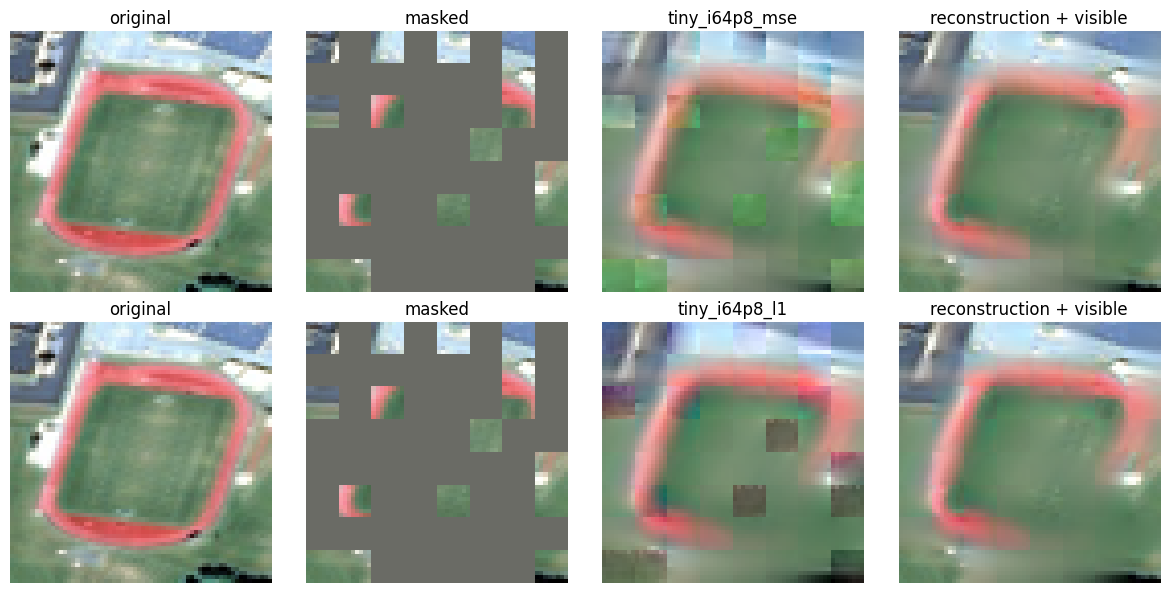

In [23]:
show_comp('./images/0.jpg', models, maskseed=1234)

# run_one_image(img, model_mae, seed=2)

2


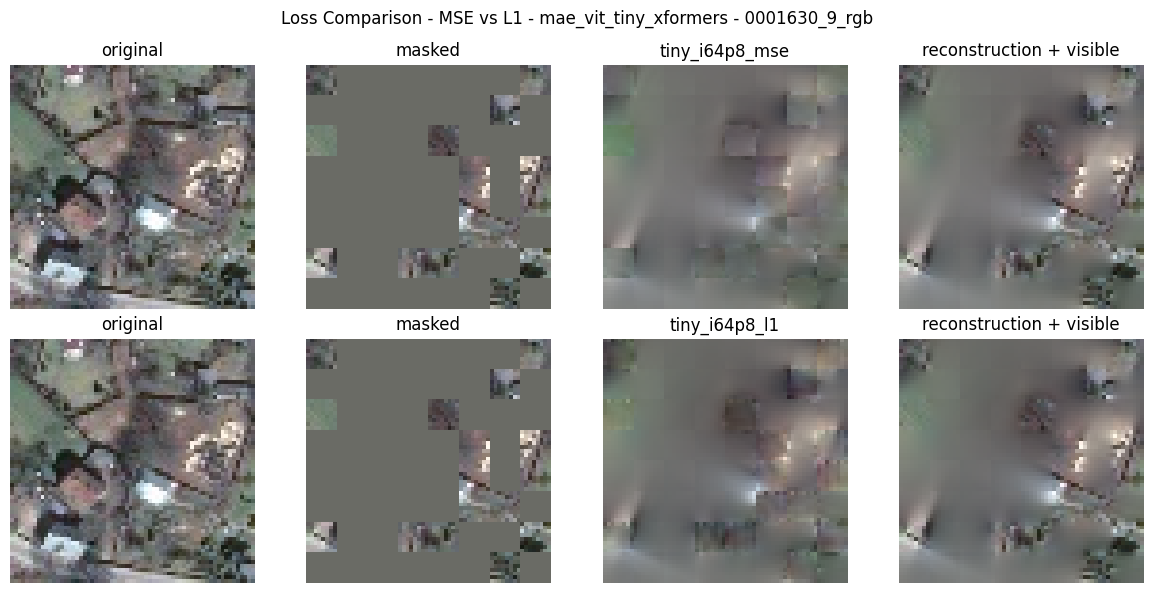

2


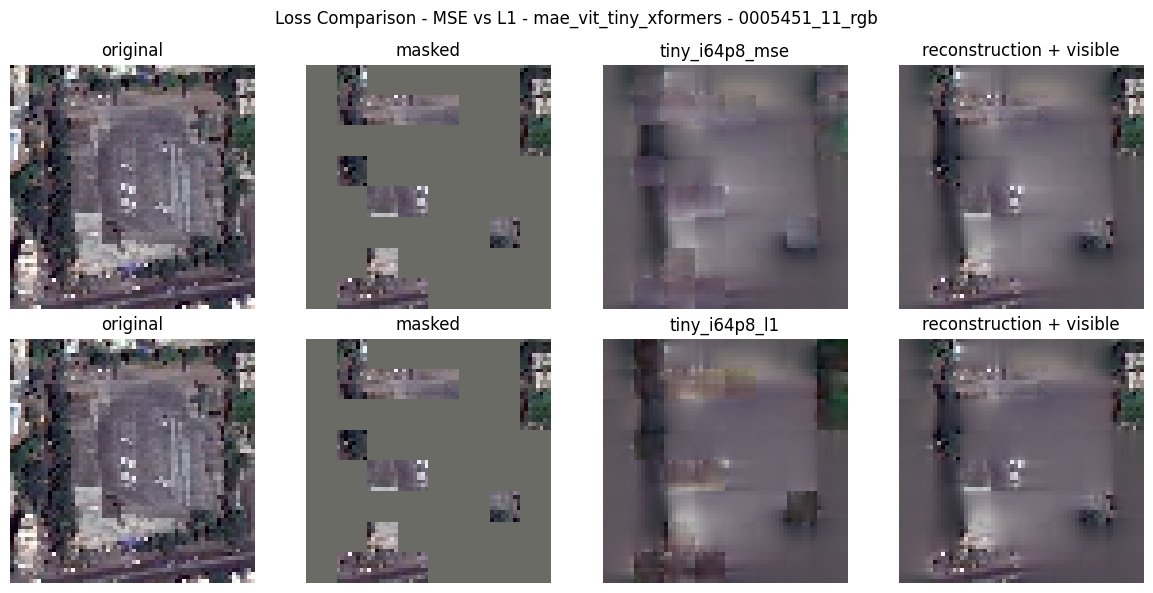

2


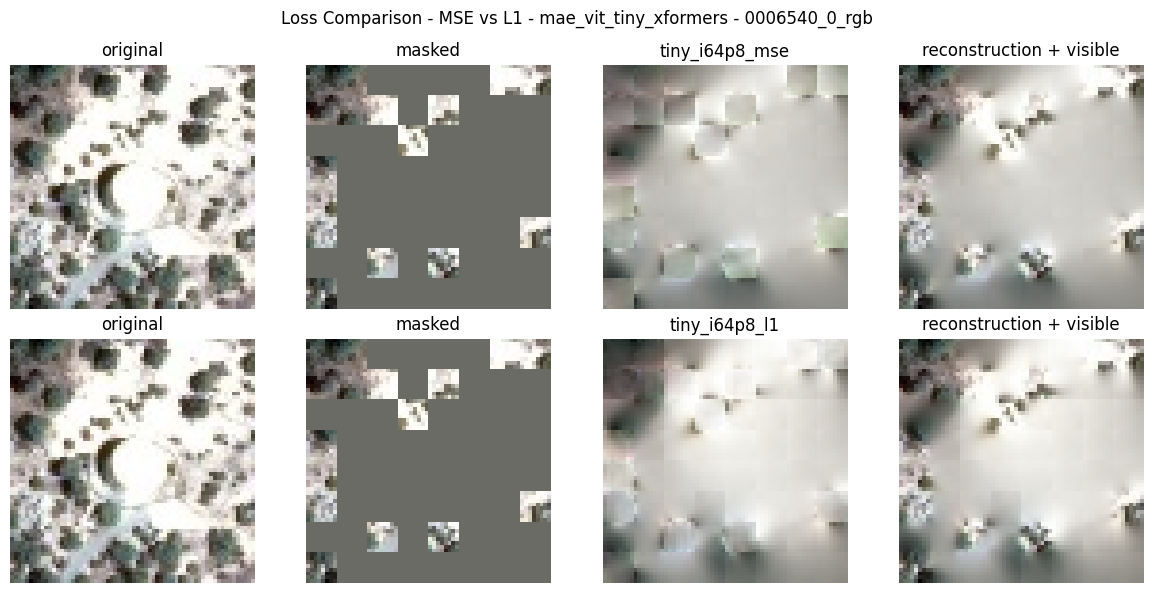

2


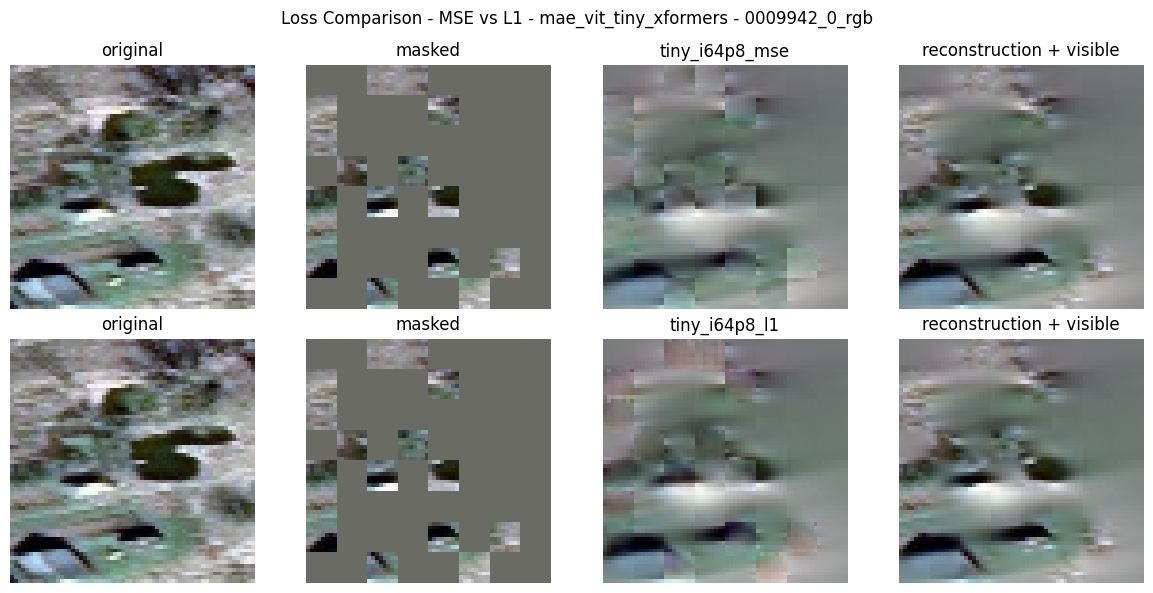

2


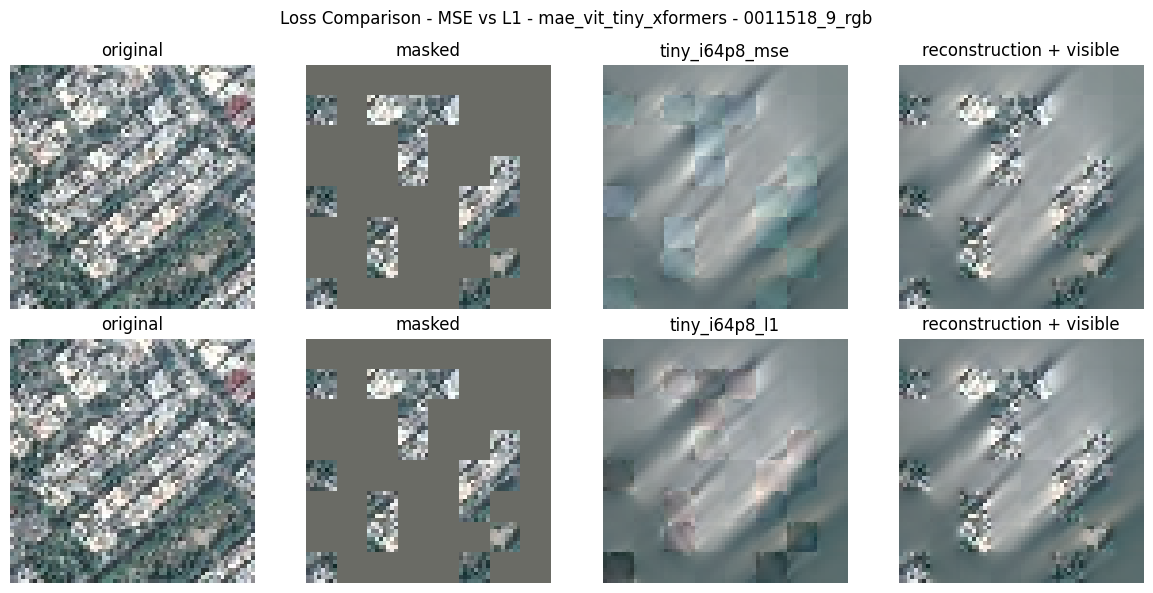

2


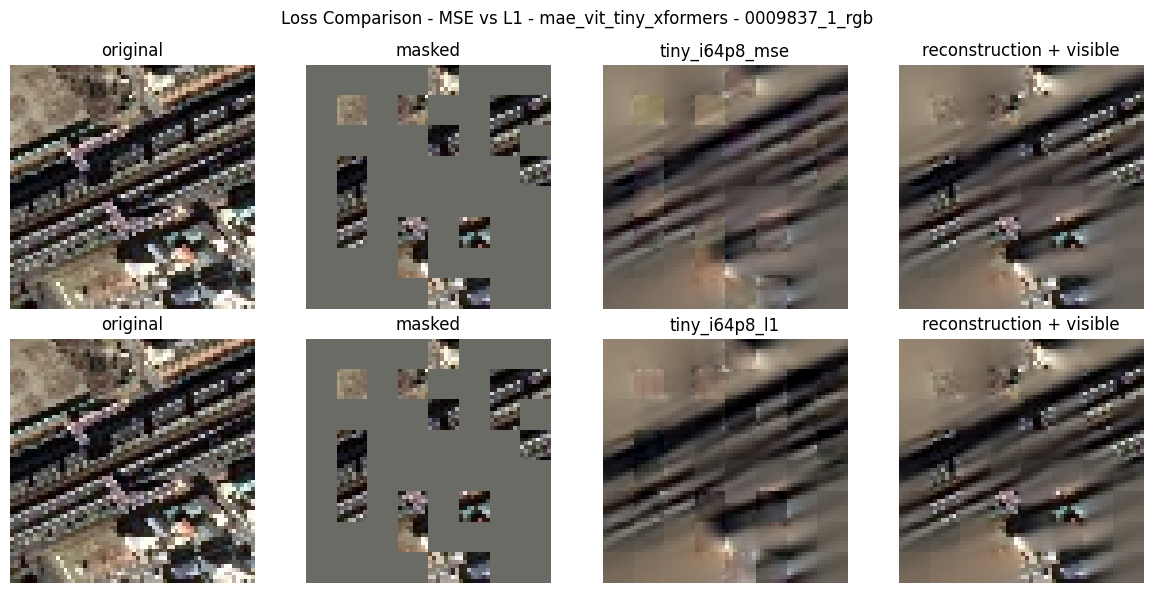

2


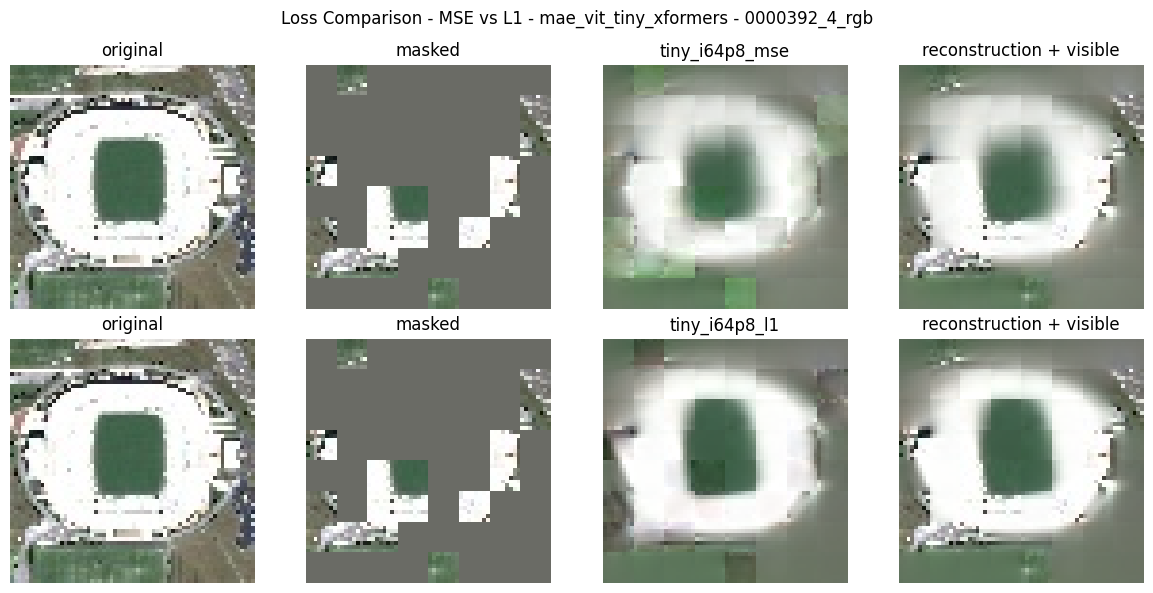

2


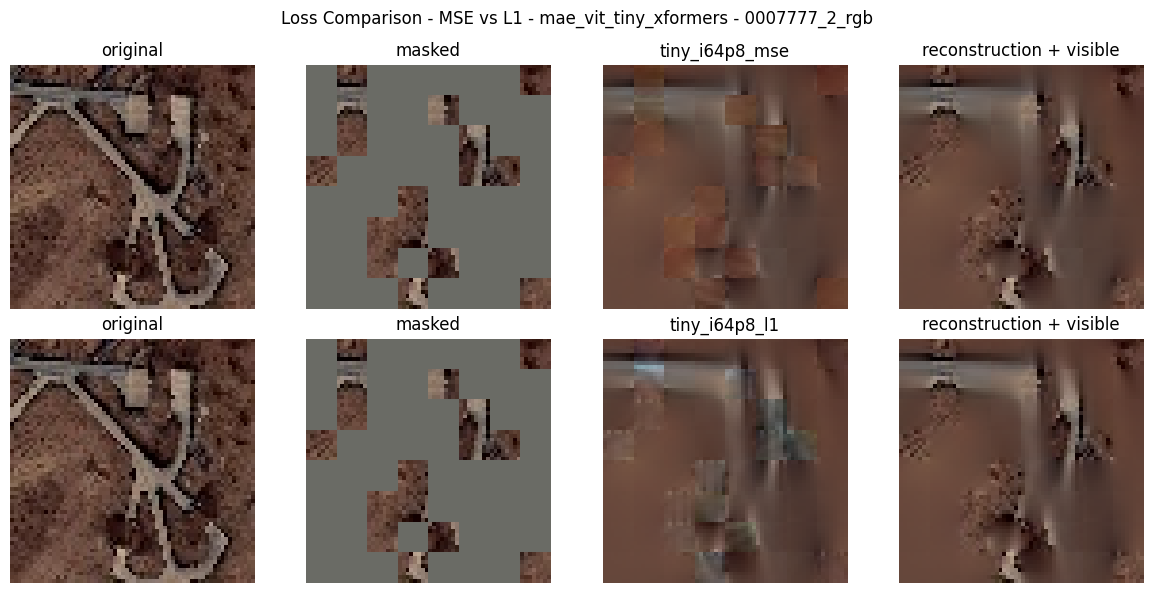

2


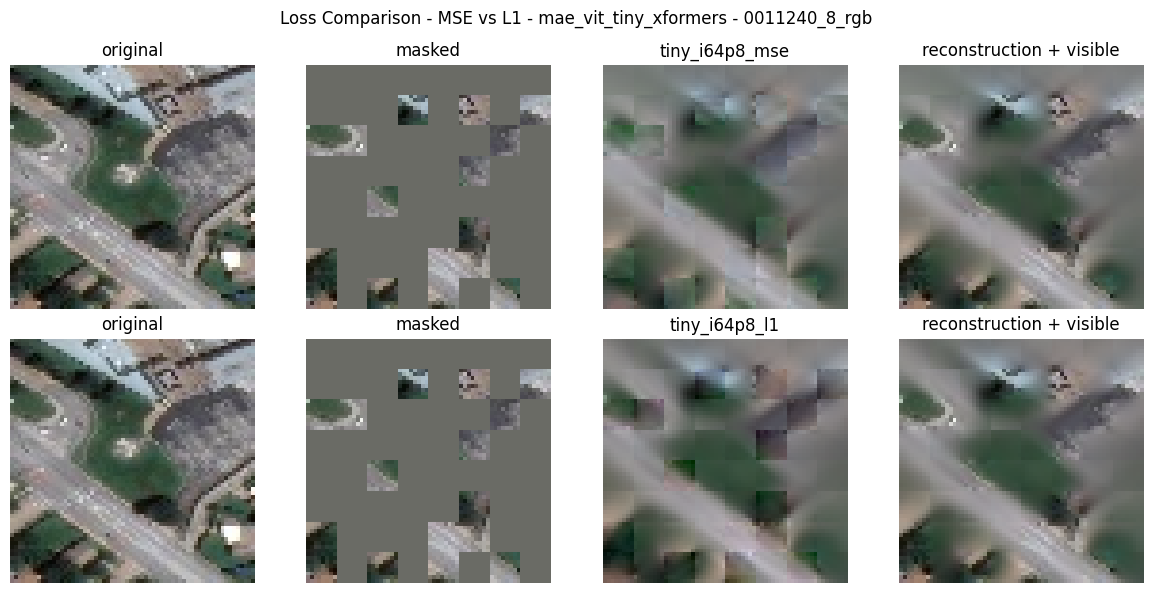

2


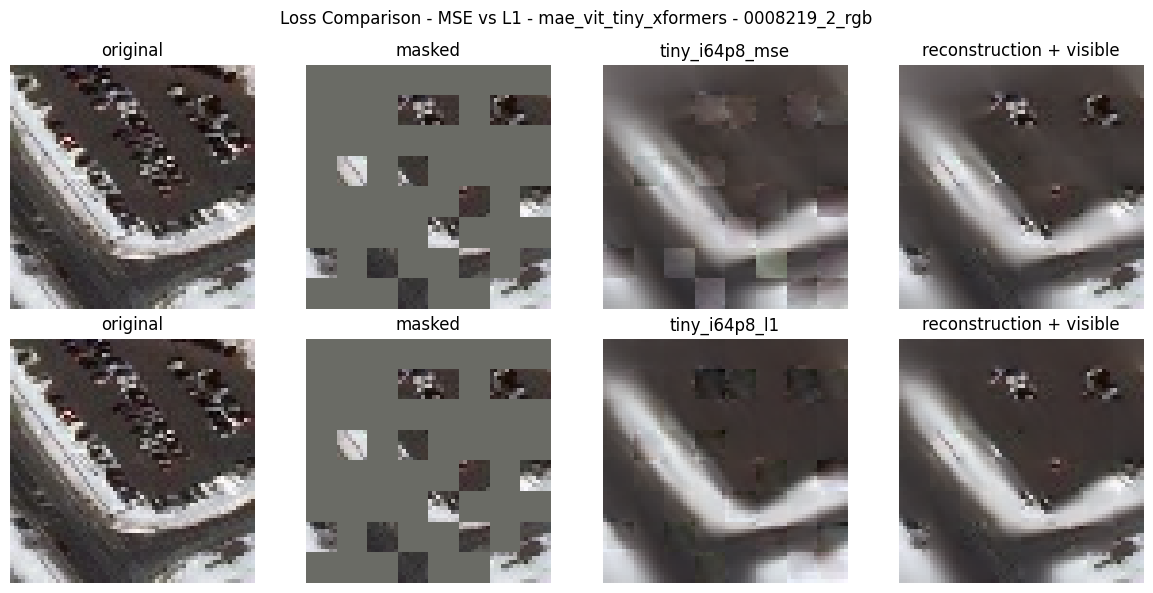

2


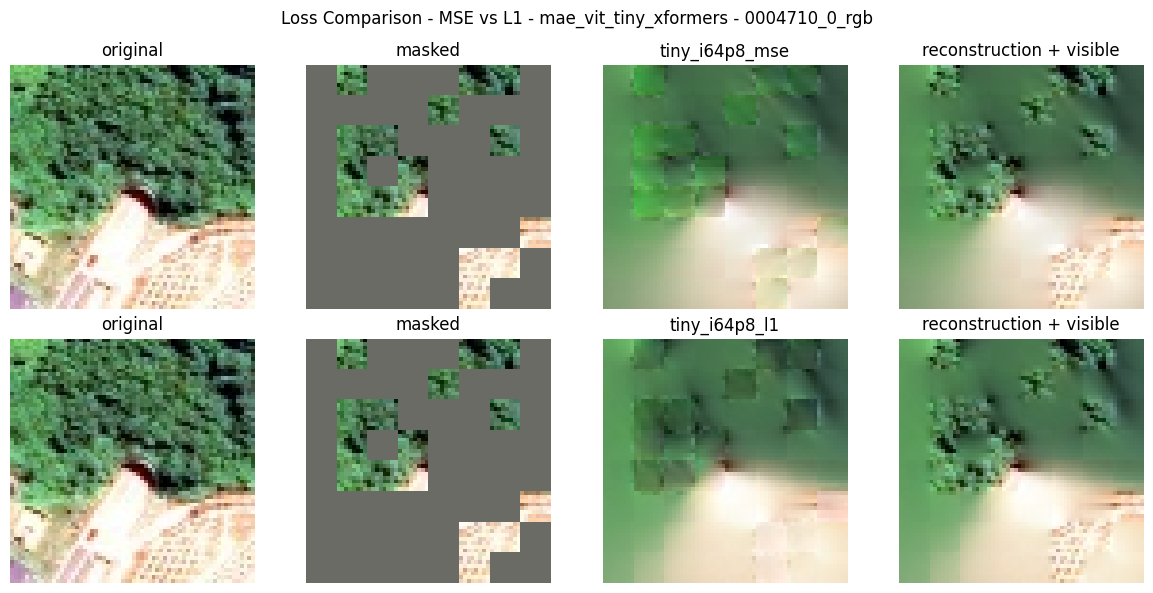

2


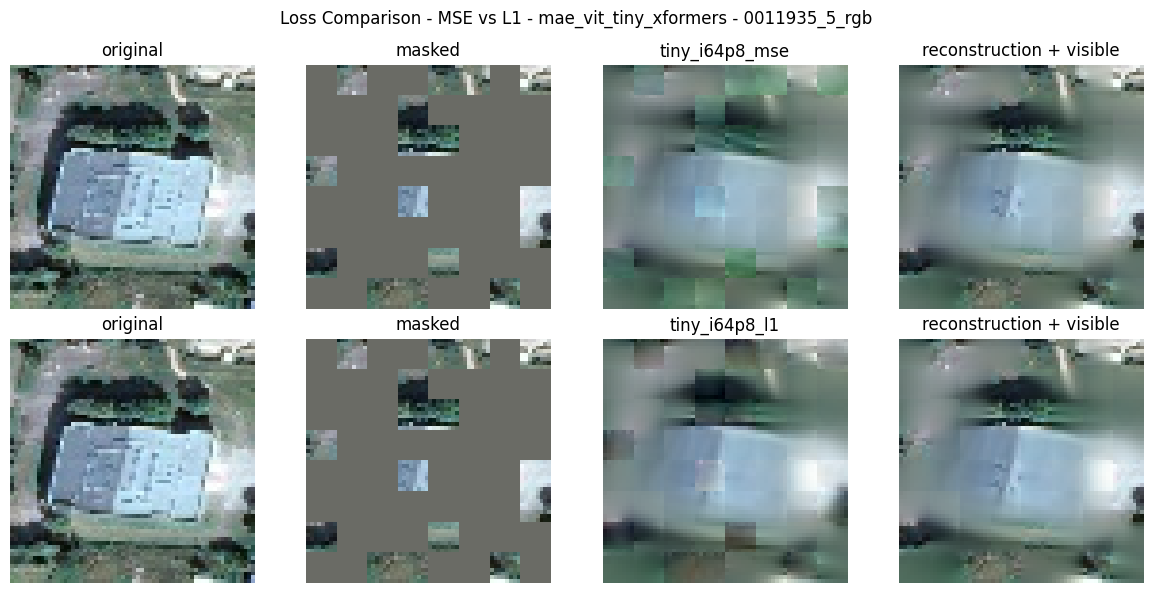

2


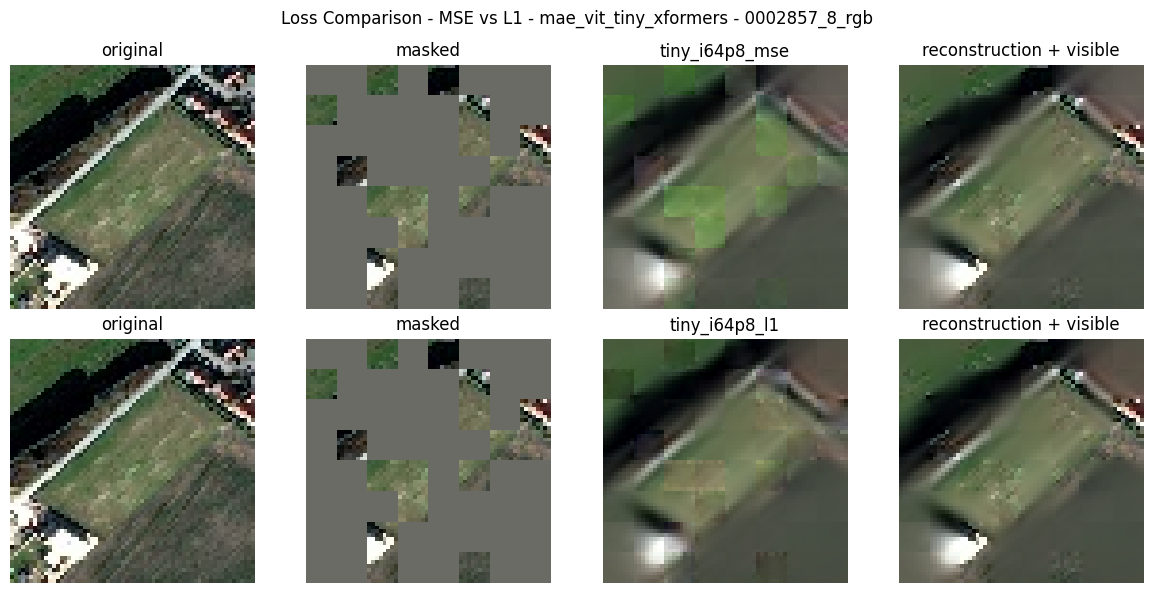

2


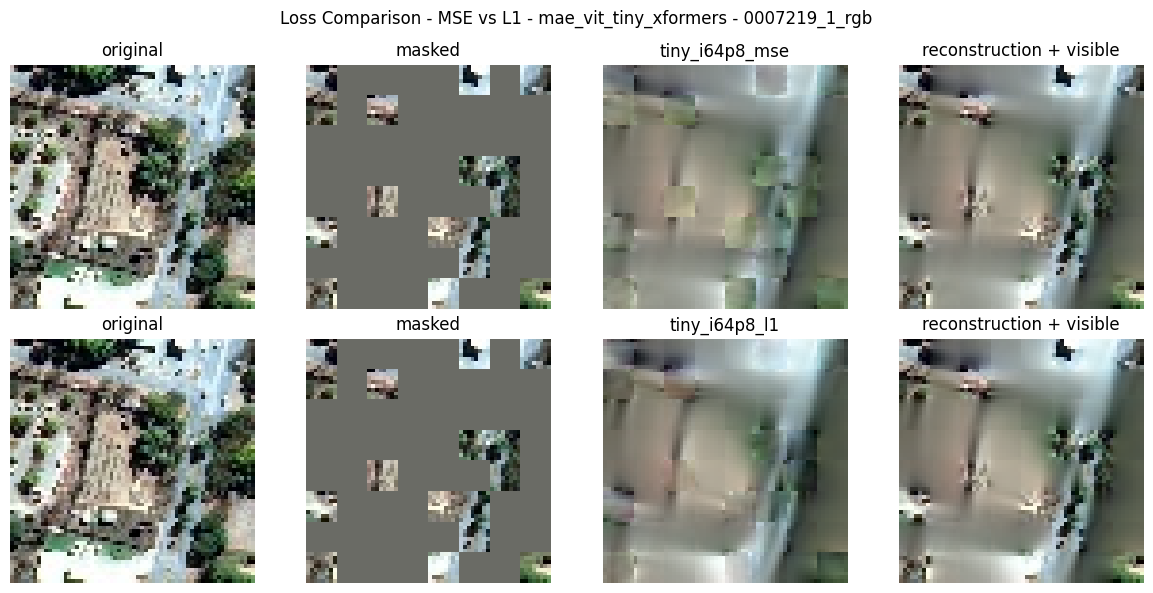

2


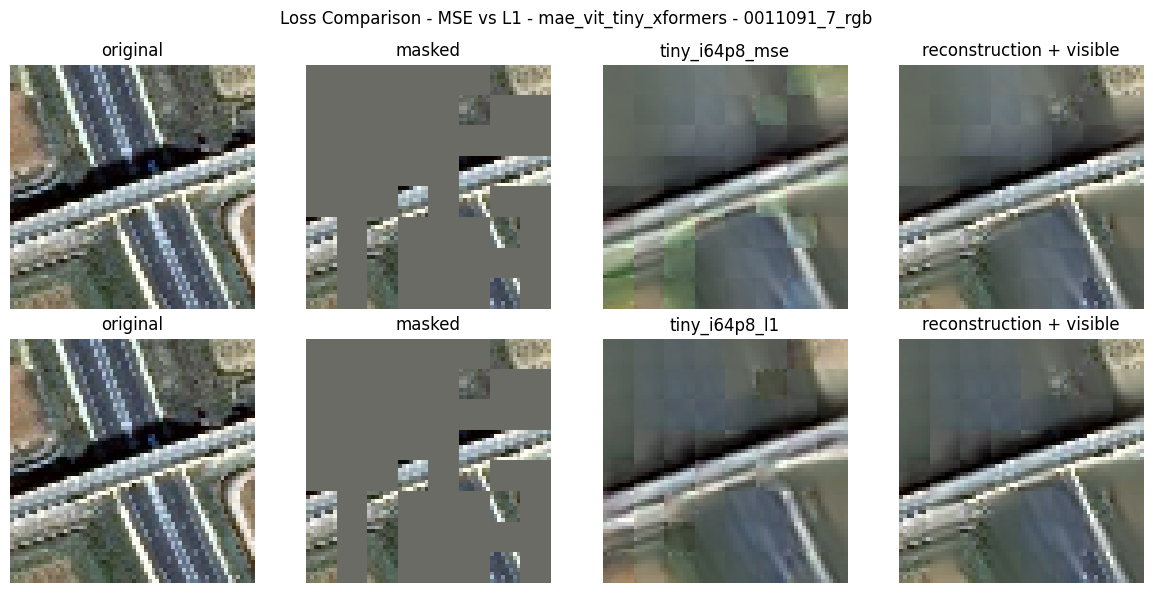

2


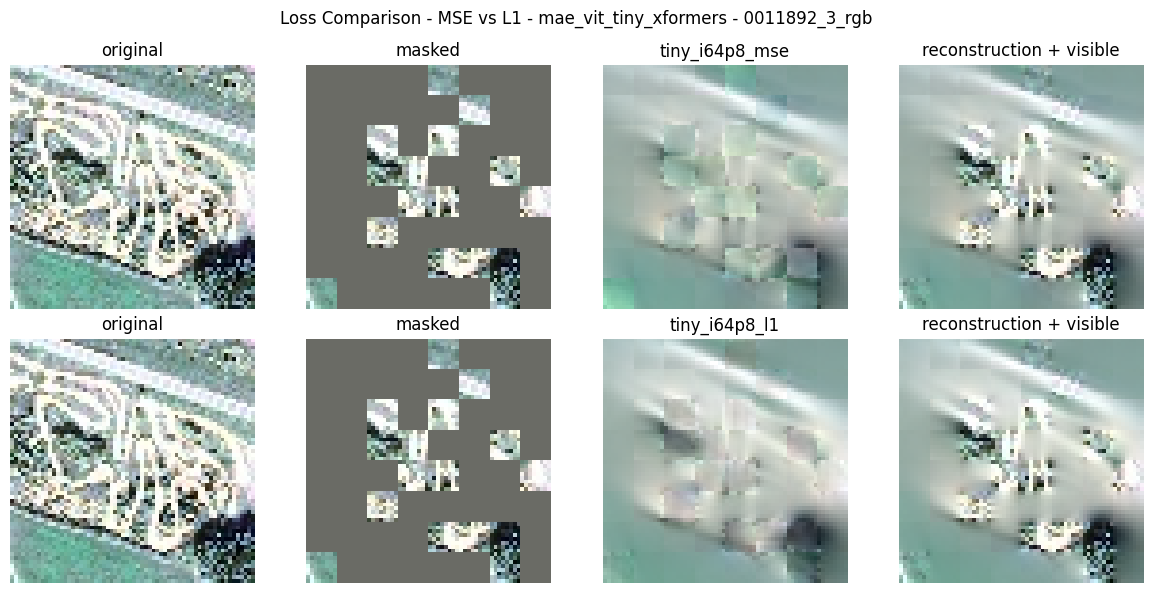

2


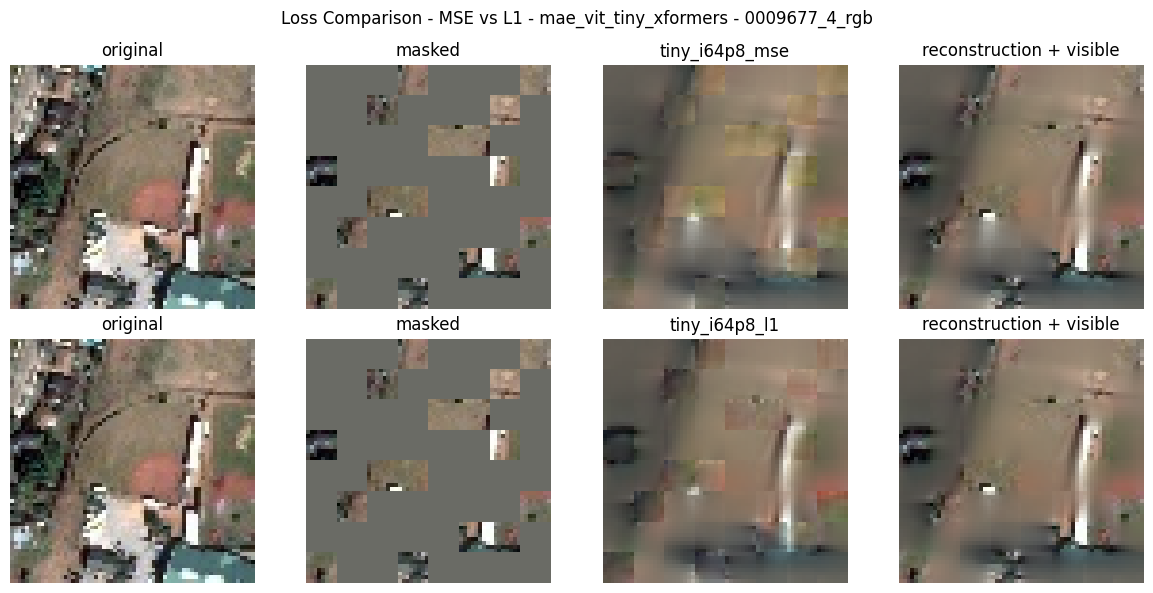

2


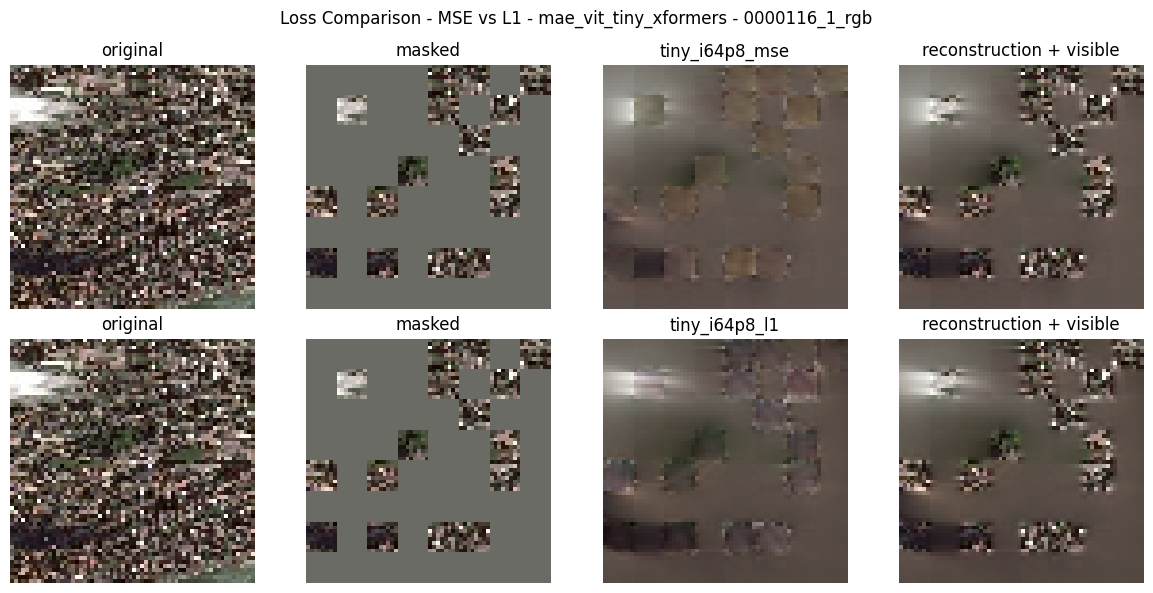

2


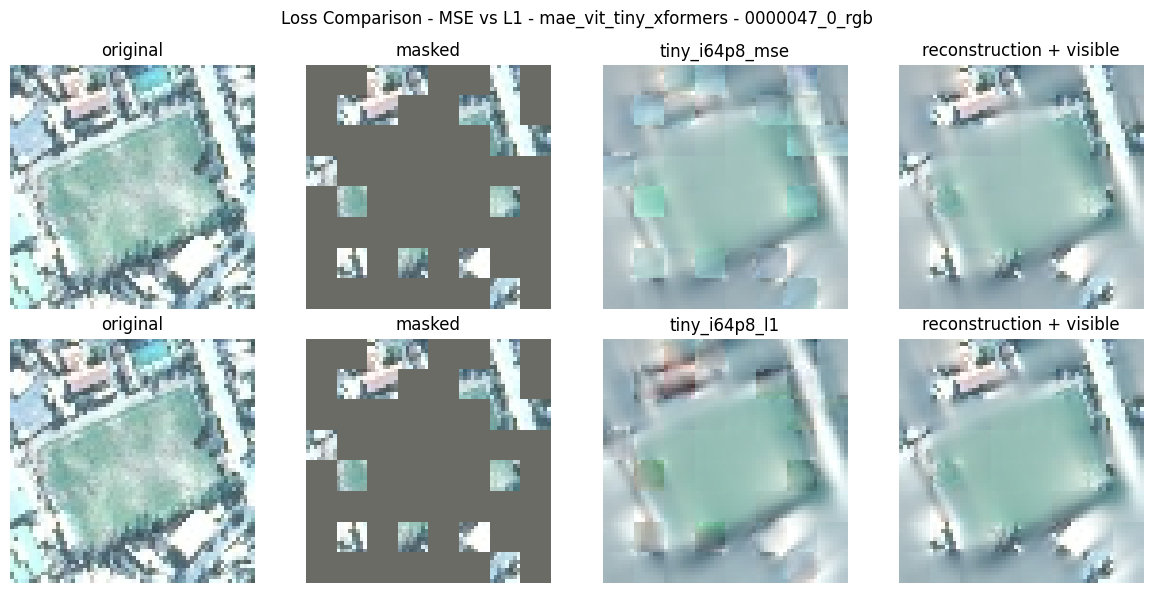

2


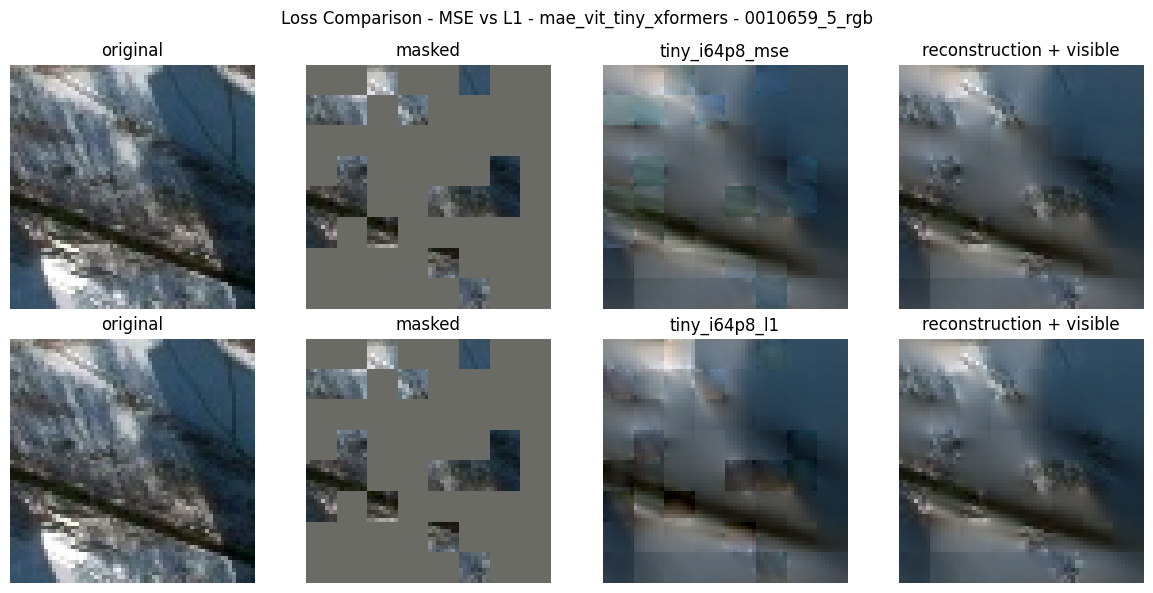

In [24]:
basedir = "../fmow-rgb-preproc/data_64/input/test_data/test/"
# basedir = "./images/"
num_images = 20
num_each = 1
walkseed = None
maskseed = None
use_noise = None
# use_noise = ("gaussian", 0.25)
resample = PIL.Image.Resampling.BICUBIC

base_title = "Loss Comparison - MSE vs L1 - mae_vit_tiny_xformers"

# for img_path in glob.iglob(basedir + '**/*.jpg', recursive=True):
random.seed(walkseed)
for _ in range(num_images):
    img_path = random.choice(glob.glob(f'{basedir}**/*.jpg', recursive=True))
    for _ in range(num_each):
        mseed = random.randint(0, 1000) if maskseed is None else maskseed
        # img = viz.add_noise(img, noise_type="s&p", noise_param=0.05)
        base_fname = os.path.basename(img_path).split(".")[0]
        show_comp(img_path, models, maskseed=mseed, title=f"{base_title} - {base_fname}", use_noise=None, resample=resample)
        if use_noise is not None:
            show_comp(img_path, models, maskseed=mseed, use_noise=use_noise, title=f"{base_title} - {base_fname} - {use_noise[0]} noise {use_noise[1]}", resample=resample)